<a href="https://colab.research.google.com/github/hsw1805/ML-DL/blob/main/04_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법(SGD)

- 여기서 확률적이란?

  전체 데이터 샘플을 이용하는 것이 아닌 하나의 샘플을 훈련 세트에서 랜덤하게 골라 학습하는 방법

  이러한 훈련을 전체 샘플에 대해 반복해서 하는 것

#요약

확률적 경사 하강법 : 샘플 한개

미니 배치 경사 하강법 : 샘플 몇 개

배치 경사 하강법 : 샘플 전체



## 손실함수란?

머신러닝의 알고리즘이 얼마나 엉터리인지를 측정하는 기준

위에서 알아봤던 경사하강법을 통해 손실함수의 값을 줄이는 것을 목표로 한다.

**cost function과는 다르다!**

cost function(비용함수)는 훈련 세트에 있는 모든 샘플에 대한 손실함수의 합


In [1]:
  import pandas as pd

  fish = pd.read_csv('https://bit.ly/fish_csv_data')



In [3]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [5]:
#데이터 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [17]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log_loss', max_iter = 100000, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


In [18]:

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.907563025210084
0.925


In [19]:
import numpy as np

sc = SGDClassifier(loss = 'log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))


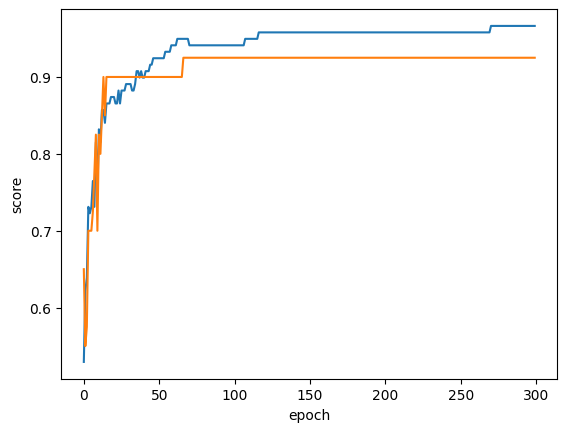

In [20]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('score')
plt.show()